# Data Pre-processing

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
df['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [3]:
print('(rows,cols) :',df.shape)

(rows,cols) : (3276, 10)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
df['Potability'].unique()

array([0, 1], dtype=int64)

In [6]:
df['Potability']=df['Potability'].astype('category')

In [7]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [8]:
missing_col=['ph','Sulfate','Trihalomethanes']

In [9]:
print('% of missing values\n')
for col in missing_col:
    pct=(df[col].isnull().sum()/len(df))*100
    print(col+': {:.2f}%'.format(pct),'\n')

% of missing values

ph: 14.99% 

Sulfate: 23.84% 

Trihalomethanes: 4.95% 



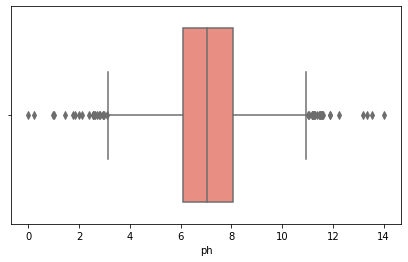

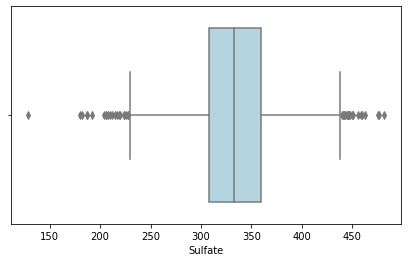

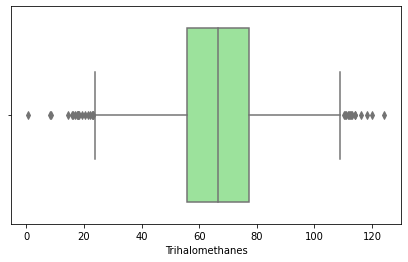

In [10]:
colors=['salmon','lightblue','lightgreen']
i=0
for col in missing_col:
    fig,ax=plt.subplots(figsize=(7,4))
    sns.boxplot(df[col],color=colors[i],ax=ax)
    i+=1

In [11]:
df.groupby(['Potability'])['ph'].transform('median')

0       7.035456
1       7.035456
2       7.035456
3       7.035456
4       7.035456
          ...   
3271    7.036752
3272    7.036752
3273    7.036752
3274    7.036752
3275    7.036752
Name: ph, Length: 3276, dtype: float64

In [12]:
#Imputing the null values with the median of the feature with respect to 'Potability'
for col in missing_col:
    df[col].fillna(df.groupby(['Potability'])[col].transform('median'),inplace=True)

In [13]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [14]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

<AxesSubplot:xlabel='Turbidity', ylabel='Density'>

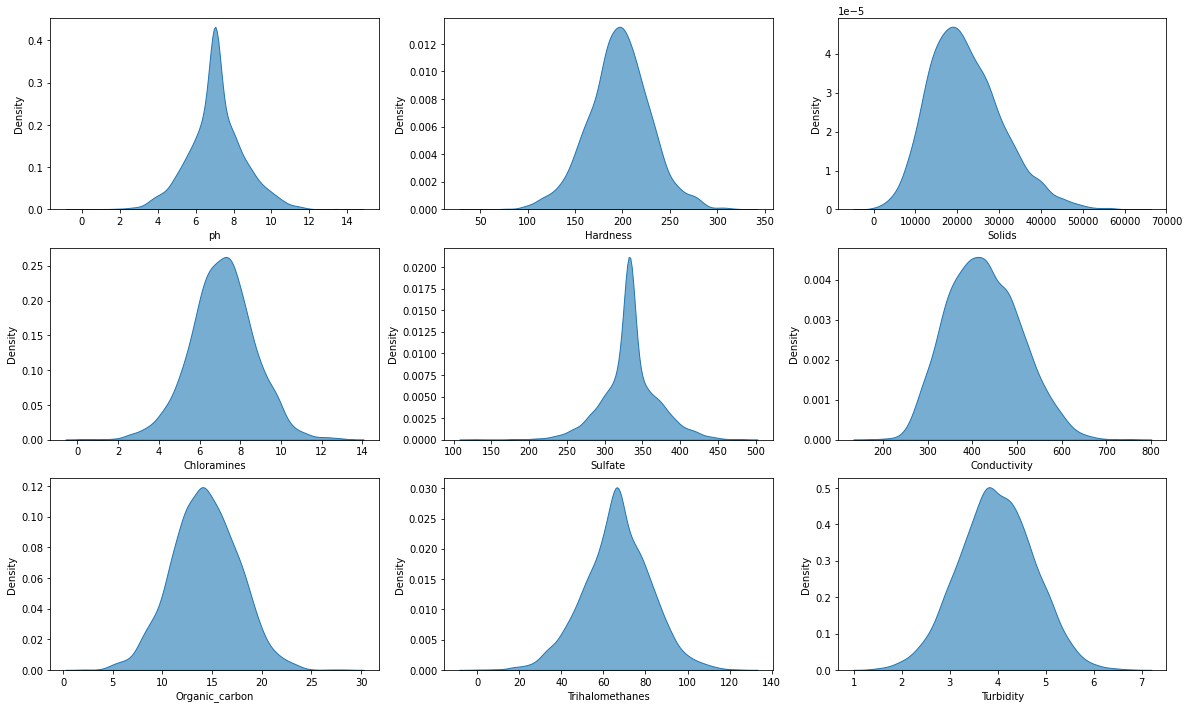

In [15]:
fig,ax=plt.subplots(3,3,figsize=(20,12))

sns.kdeplot(df['ph'],alpha=0.6,fill=True,ax=ax[0,0])
sns.kdeplot(df['Hardness'],alpha=0.6,fill=True,ax=ax[0,1])
sns.kdeplot(df['Solids'],alpha=0.6,fill=True,ax=ax[0,2])
sns.kdeplot(df['Chloramines'],alpha=0.6,fill=True,ax=ax[1,0])
sns.kdeplot(df['Sulfate'],alpha=0.6,fill=True,ax=ax[1,1])
sns.kdeplot(df['Conductivity'],alpha=0.6,fill=True,ax=ax[1,2])
sns.kdeplot(df['Organic_carbon'],alpha=0.6,fill=True,ax=ax[2,0])
sns.kdeplot(df['Trihalomethanes'],alpha=0.6,fill=True,ax=ax[2,1])
sns.kdeplot(df['Turbidity'],alpha=0.6,fill=True,ax=ax[2,2])

<AxesSubplot:xlabel='Turbidity'>

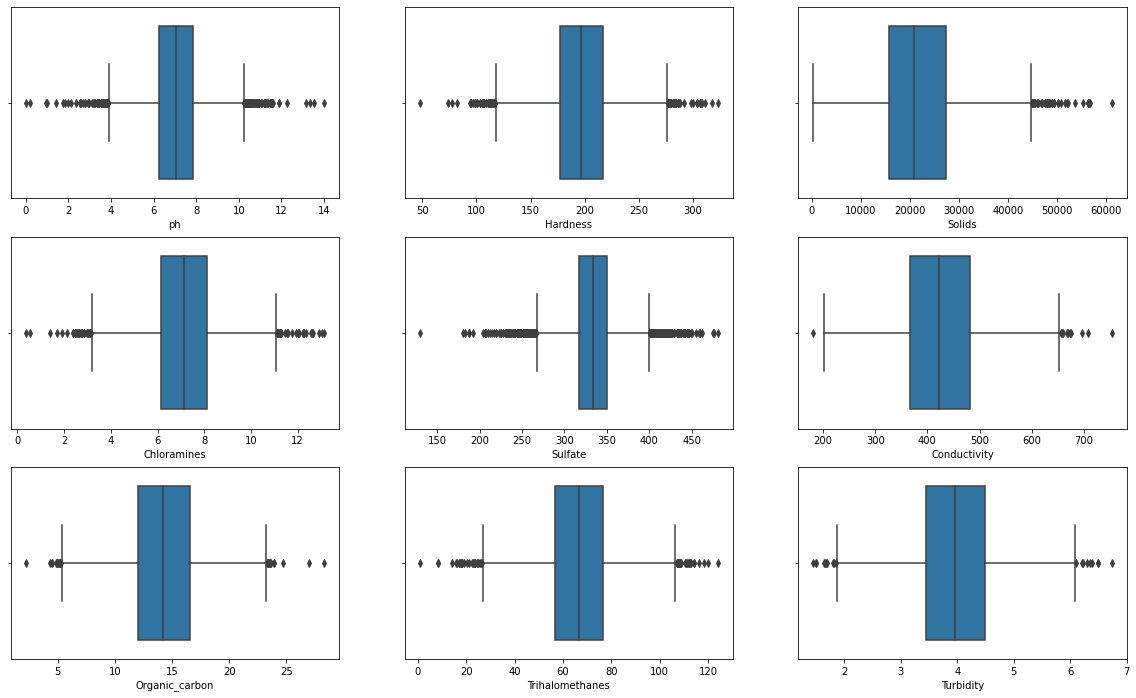

In [16]:
fig,ax=plt.subplots(3,3,figsize=(20,12))

sns.boxplot(df['ph'],ax=ax[0,0])
sns.boxplot(df['Hardness'],ax=ax[0,1])
sns.boxplot(df['Solids'],ax=ax[0,2])
sns.boxplot(df['Chloramines'],ax=ax[1,0])
sns.boxplot(df['Sulfate'],ax=ax[1,1])
sns.boxplot(df['Conductivity'],ax=ax[1,2])
sns.boxplot(df['Organic_carbon'],ax=ax[2,0])
sns.boxplot(df['Trihalomethanes'],ax=ax[2,1])
sns.boxplot(df['Turbidity'],ax=ax[2,2])

# Handling outliers

In [17]:
#Function to identify outliers using IQR to calculate the upper and lower boundary
outliers_list=[]
def outliers(df,col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    
    uw=Q3+(1.5*IQR)
    lw=Q1-(1.5*IQR)
    
    #print('Column:',col)
    #print('Upper bound:',uw)
    #print('Lower bound:',lw,'\n')
    
    for val in df[col]:
        if (val<lw or val>uw):
            outliers_list.append(val)
    return outliers_list

In [18]:
#Data with outliers
df_o=df.drop(columns='Potability')

#Data with outliers dropped
df_od=df

#Data with outliers replaced
df_or=df.drop(columns='Potability')

In [19]:
#Target variable
target=pd.DataFrame(df['Potability'])

In [20]:
#Dropping the outliers
for col in df_od.drop(columns='Potability').columns:
    outliers_data=outliers(df_od,col)
    for i in outliers_data:
        df_od.drop(df_od[df_od[col]==i].index,inplace=True)
    #print(col+':',len(outliers_data))
    outliers_data.clear()

ph: 142
Hardness: 74
Solids: 41
Chloramines: 52
Sulfate: 229
Conductivity: 7
Organic_carbon: 15
Trihalomethanes: 41
Turbidity: 18


In [21]:
df_od.shape

(2657, 10)

In [22]:
#Replacing outliers with median
for col in df_or.columns:
    outliers_data=outliers(df_or,col)
    for i in outliers_data:
        df_or.loc[df_or[col]==i,col]=df_or[col].median()
    outliers_data.clear()

In [23]:
df_or.shape

(3276, 9)

In [24]:
df_o.to_csv('WQ_With_Outliers.csv')

In [58]:
df_od.to_csv('WQ_Without_Outliers.csv')

In [26]:
df_or.to_csv('WQ_Replaced_Outliers.csv')

In [27]:
target.to_csv('Target_variable.csv')

<AxesSubplot:xlabel='Turbidity'>

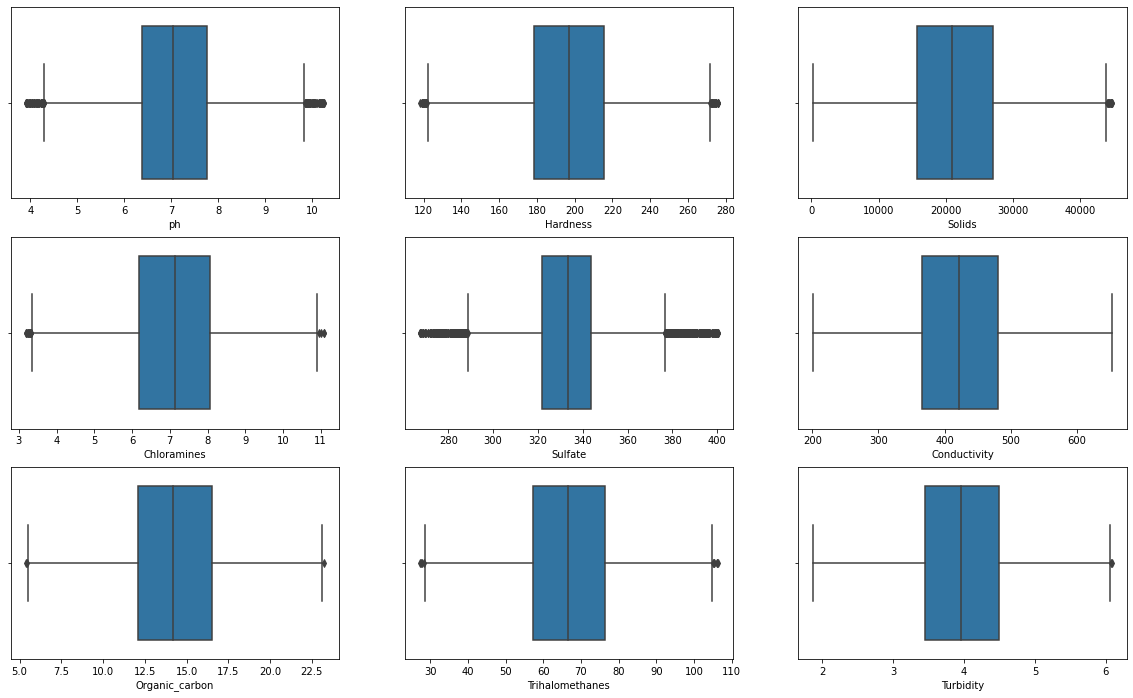

In [28]:
fig,ax=plt.subplots(3,3,figsize=(20,12))

sns.boxplot(df_or['ph'],ax=ax[0,0])
sns.boxplot(df_or['Hardness'],ax=ax[0,1])
sns.boxplot(df_or['Solids'],ax=ax[0,2])
sns.boxplot(df_or['Chloramines'],ax=ax[1,0])
sns.boxplot(df_or['Sulfate'],ax=ax[1,1])
sns.boxplot(df_or['Conductivity'],ax=ax[1,2])
sns.boxplot(df_or['Organic_carbon'],ax=ax[2,0])
sns.boxplot(df_or['Trihalomethanes'],ax=ax[2,1])
sns.boxplot(df_or['Turbidity'],ax=ax[2,2])

## Handling imbalanced data and scaling 

In [39]:
df_od.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.035456,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
2,8.099124,224.236259,19909.541732,9.275884,333.389426,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0


In [41]:
df_od.shape

(2657, 10)

In [42]:
x=df.drop(columns='Potability')
y=df['Potability']

In [43]:
smote=SMOTE()

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [45]:
x_train,y_train=smote.fit_resample(x_train,y_train)

In [46]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)